In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models


In [2]:
import os
import pandas as pd

# Ana dizin yolu (veri setinin bulunduğu yer)
base_dir = "lung_colon_image_set"

# Klasör adları ve etiketleri eşleştiren yapı
label_dirs = {
    "colon_image_sets\colon_aca": "colon_aca",
    "colon_image_sets\colon_n": "colon_n",
    "lung_image_sets\lung_aca": "lung_aca",
    "lung_image_sets\lung_n": "lung_n",
    "lung_image_sets\lung_scc": "lung_scc"
}

# Dosya yollarını ve etiketleri saklayacağımız listeler
file_paths = []
labels = []

# Her klasördeki dosya yollarını ve etiketlerini al
for sub_dir, label in label_dirs.items():
    folder_path = os.path.join(base_dir, sub_dir)
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpeg"):  
            file_paths.append(os.path.join(folder_path, file_name))
            labels.append(label)

# DataFrame'e kaydet
data = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})


In [3]:
data

,file_path,label
0,lung_colon_image_set\colon_image_sets\colon_ac...,colon_aca
1,lung_colon_image_set\colon_image_sets\colon_ac...,colon_aca
2,lung_colon_image_set\colon_image_sets\colon_ac...,colon_aca
3,lung_colon_image_set\colon_image_sets\colon_ac...,colon_aca
4,lung_colon_image_set\colon_image_sets\colon_ac...,colon_aca
...,...,...
24995,lung_colon_image_set\lung_image_sets\lung_scc\...,lung_scc
24996,lung_colon_image_set\lung_image_sets\lung_scc\...,lung_scc
24997,lung_colon_image_set\lung_image_sets\lung_scc\...,lung_scc
24998,lung_colon_image_set\lung_image_sets\lung_scc\...,lung_scc


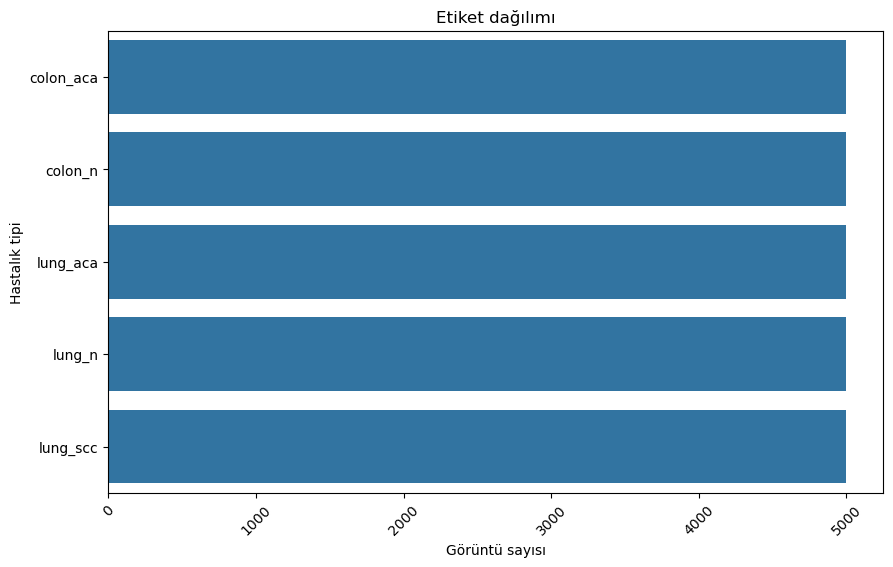

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data['label'])
plt.title('Etiket dağılımı')
plt.xlabel('Görüntü sayısı')
plt.ylabel('Hastalık tipi')
plt.xticks(rotation=45)
plt.show()

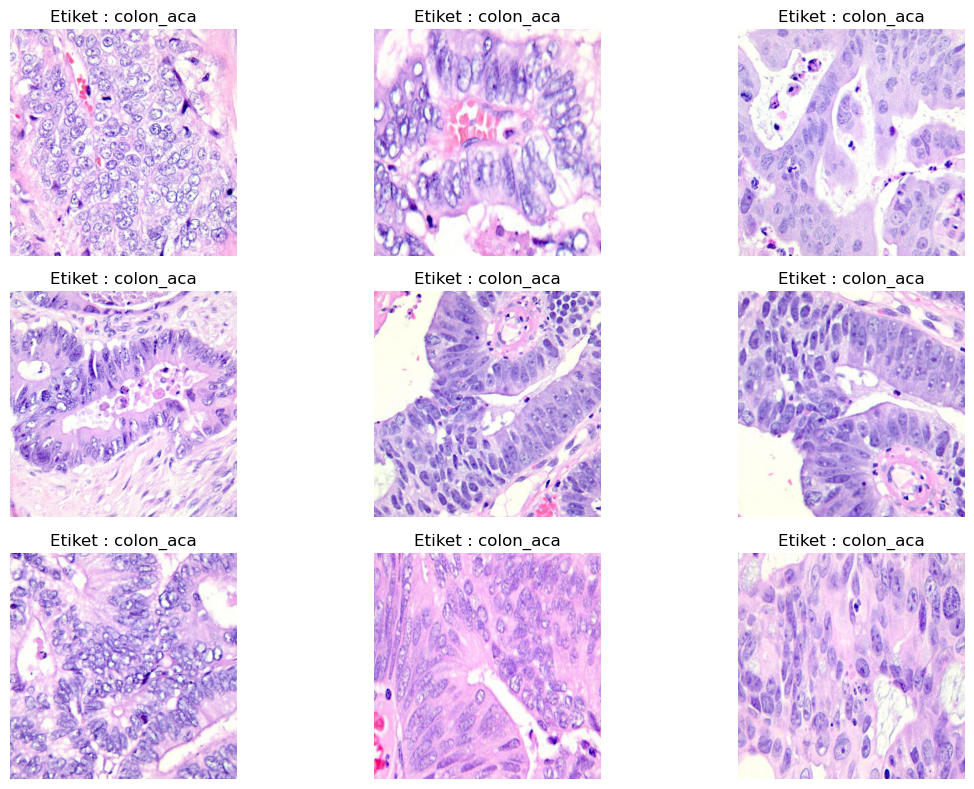

In [5]:
def goruntu_cagir(image_path,labels, number=9):
    plt.figure(figsize=(12,8))
    for i in range(number):
        img = cv2.imread(image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f'Etiket : {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

goruntu_cagir(file_paths, labels, number=9 )

In [6]:
IMG_SIZE = 224

def resim_boyutlandirma(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 225.0
    return img
X = np.array([resim_boyutlandirma(path) for path in data['file_path']])
y = pd.get_dummies(data['label']).values

In [7]:
y

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       ...,
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

In [8]:
new_y = y.astype(int)

In [9]:
new_y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.33, random_state=42)

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train[0]), activation='softmax')

])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=13, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 309s 586ms/step - accuracy: 0.6424 - loss: 0.8043 - val_accuracy: 0.8953 - val_loss: 0.2620
Epoch 2/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 217s 414ms/step - accuracy: 0.8770 - loss: 0.2992 - val_accuracy: 0.8925 - val_loss: 0.2867
Epoch 3/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 218s 414ms/step - accuracy: 0.9239 - loss: 0.1992 - val_accuracy: 0.9342 - val_loss: 0.1778
Epoch 4/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 218s 414ms/step - accuracy: 0.9522 - loss: 0.1255 - val_accuracy: 0.9202 - val_loss: 0.2290
Epoch 5/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 217s 412ms/step - accuracy: 0.9689 - loss: 0.0838 - val_accuracy: 0.9432 - val_loss: 0.1581
Epoch 6/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 217s 413ms/step - accuracy: 0.9836 - loss: 0.0471 - val_accuracy: 0.9200 - val_loss: 0.2600
Epoch 7/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 217s 413ms/step - accuracy: 0.9767 - loss: 0.0672 - val_accuracy: 0.9308 - val_loss: 0.2567
Epoch 8/13
524/524 ━━━━━━━━━━━━━━━━━━━━ 216s 411ms/step - accuracy: 0.9837 -

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'test doğruluk oranı : {test_acc}')

258/258 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.9372 - loss: 0.3206
test doğruluk oranı : 0.935272753238678


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


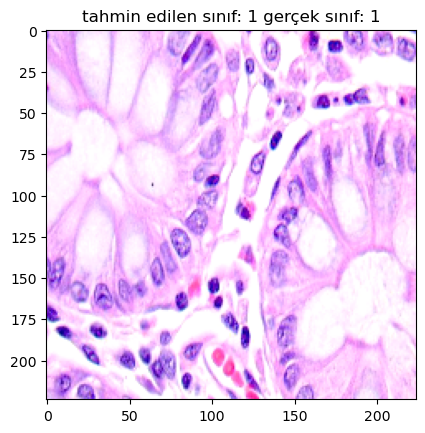

 
        0 : colon_aca 
        1 : colon_n
        2 : lung_aca
        3 : lung_n
        4 : lung_scc
      
tahmin edilen sınıf: 1
gerçek sınıf: 1


In [18]:
test_img = X_test[300]
true_label = np.argmax(y_test[300])

predict = model.predict(np.expand_dims(test_img, axis=0))
predict_class = np.argmax(predict[0])

plt.imshow(test_img)
plt.title(f'tahmin edilen sınıf: {predict_class} gerçek sınıf: {true_label}')
plt.show()


print(""" 
        0 : colon_aca 
        1 : colon_n
        2 : lung_aca
        3 : lung_n
        4 : lung_scc
      """)

print(f'tahmin edilen sınıf: {predict_class}')
print(f'gerçek sınıf: {true_label}')

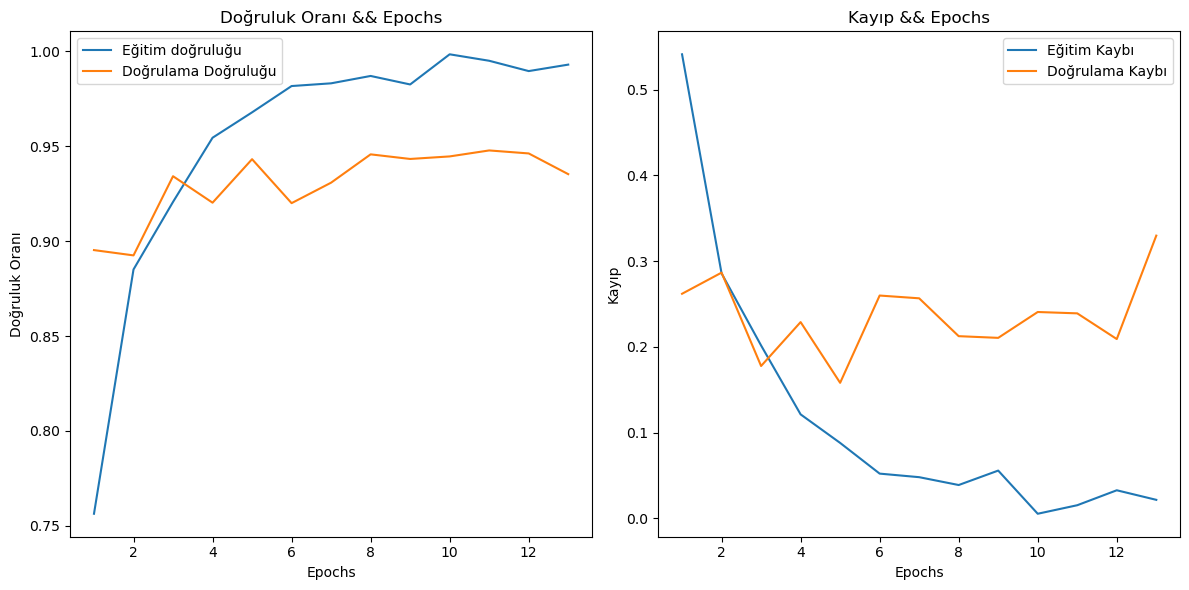

In [19]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_acc)+1)

# Doğruluk oranı
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Eğitim doğruluğu')
plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu')
plt.title('Doğruluk Oranı && Epochs')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk Oranı')
plt.legend()

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Eğitim Kaybı')
plt.plot(epochs, val_loss, label='Doğrulama Kaybı')
plt.title('Kayıp && Epochs')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()